## Analysis

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [75]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')
bg_included = pd.read_csv('data/bg_pop_included.csv')

In [76]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [77]:
dist = dist_miles.values
N = population['population'].values
prop = bg_included['all_included'].values

In [78]:
infile = open('pods_open_total','rb')
pods_total = pickle.load(infile)
infile.close()

In [84]:
infile = open('pods_open_minmax','rb')
pods_minmax = pickle.load(infile)
infile.close()

### Comparing average and maximum distance by PODs opened

In [85]:
dist_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_total.keys():
    dist_compare['num_pods'].append(k)
    
    # Minimize total distance
    total_list = [N[j] * [dist[j,i]] for [j,i] in pods_total[k]]
    total_list_flat = [item for sublist in total_list for item in sublist]
    avg_total = sum(total_list_flat)/len(total_list_flat)
    max_total = max(total_list_flat)
    
    # Minimize maximum distance
    minmax_list = [N[j] * [dist[j,i]] for [j,i] in pods_minmax[k]]
    minmax_list_flat = [item for sublist in minmax_list for item in sublist]
    avg_minmax = sum(minmax_list_flat)/len(minmax_list_flat)
    max_minmax = max(minmax_list_flat)
    
    dist_compare['max_dist_total'].append(max_total)
    dist_compare['max_dist_minmax'].append(max_minmax)
    dist_compare['avg_dist_total'].append(avg_total)
    dist_compare['avg_dist_minmax'].append(avg_minmax)

In [88]:
dist_df = pd.DataFrame(dist_compare)

In [89]:
dist_df.head()

,num_pods,max_dist_total,max_dist_minmax,avg_dist_total,avg_dist_minmax
0,10,11.980543,9.035404,4.079687,4.997015
1,11,11.980543,8.611634,3.925553,5.492062
2,12,11.980543,8.502998,3.771784,4.842447
3,13,11.980543,8.035054,3.627613,4.876027
4,14,11.980543,7.951104,3.485437,4.552515


In [90]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

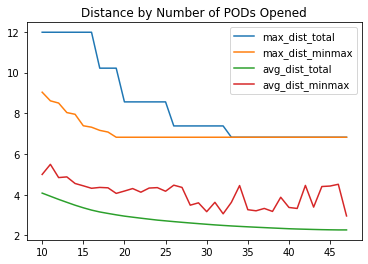

In [91]:
plt.plot(dist_df['num_pods'], dist_df[cols])
plt.title('Distance by Number of PODs Opened')
# add axis labels
plt.legend(cols)
plt.show()

### Histograms

### POD capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())